In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # styling
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

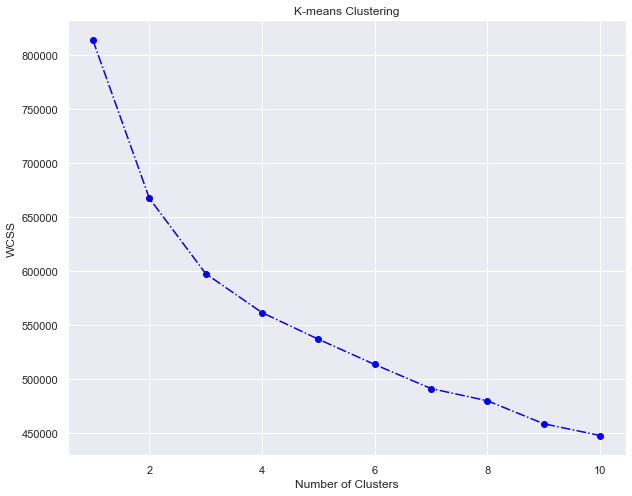

In [55]:
train = pd.read_csv(r"https://raw.githubusercontent.com/JohnTan38/Zomato/main/data/TrainData_clean.csv")
scaler = StandardScaler()
train_std = scaler.fit_transform(train)

train_std = pd.DataFrame(data=train_std, columns=train.columns)

wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(train_std)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [64]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) #k-means with 3 clusters
kmeans.fit(train_std)

df_segm_kmeans= train_std.copy() #create new df with original features, add new column with assigned clusters
train_std['Segment_Kmeans'] = kmeans.labels_

df_segm_analysis = train_std.groupby(['Segment_Kmeans']).mean()
df_segm_analysis.reset_index()

,Segment_Kmeans,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,0,0.020927,-0.319775,-0.425626,-0.259877,-0.233447,-0.176558,-0.420792,-0.522904,-0.563183,0.041156,-0.568266,-0.634652,0.0,0.0,0.028179,0.0,-0.009054,-0.014682,-0.006574
1,1,0.051680,-0.327478,-0.388195,-0.333724,-0.173844,-0.242184,-0.350999,-0.181910,0.030373,0.082490,1.303442,1.493730,0.0,0.0,0.256780,0.0,-0.437348,-0.170684,0.098179
2,2,-0.091870,0.940313,1.203758,0.831955,0.621055,0.580719,1.157208,1.183053,1.047260,-0.161475,-0.219609,-0.283389,0.0,0.0,-0.311416,0.0,0.455886,0.199253,-0.085870


In [67]:
# Add the segment labels to our table
df_segm_analysis.reset_index()
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment_Kmeans'].map({0:'Medium_MonthlyRevenue_TotalRecurringCharge', 
                                                                  1:'Low_MonthlyRevenue_TotalRecurringCharge',
                                                                  2:'High_MonthlyRevenue_TotalRecurringCharge'
                                                                  })

In [68]:
df_segm_kmeans

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,...,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,Segment_Kmeans,Labels
0,1.574637,-0.791324,-0.579923,-1.045595,-0.330867,-0.370428,-0.105387,-1.151697,-0.911747,1.334925,...,-0.632703,0.0,0.0,-0.019720,0.0,-1.472441,-0.735011,1.289211,0,Medium_MonthlyRevenue_TotalRecurringCharge
1,1.574637,-0.951102,-0.976331,-1.256411,-0.829980,-0.370428,-0.697341,-1.151697,-0.911747,1.334925,...,-0.632703,0.0,0.0,0.337279,0.0,1.306035,-0.735011,1.289211,0,Medium_MonthlyRevenue_TotalRecurringCharge
2,-0.635067,-0.472223,-0.980125,-0.370983,-0.829980,-0.370428,-0.694905,-1.132307,-0.911747,1.334925,...,-0.632703,0.0,0.0,0.694279,0.0,0.379876,-1.585944,-2.961366,0,Medium_MonthlyRevenue_TotalRecurringCharge
3,-0.635067,0.537046,1.493159,1.189056,1.645619,0.482094,0.522499,1.498297,1.600282,1.334925,...,1.568775,0.0,0.0,0.694279,0.0,1.306035,0.966856,-0.127648,2,High_MonthlyRevenue_TotalRecurringCharge
4,1.574637,-0.947683,-0.995298,-1.256411,-0.829980,-0.370428,-0.697341,-1.151697,-0.911747,1.334925,...,1.568775,0.0,0.0,1.051279,0.0,-1.472441,0.966856,1.289211,1,Low_MonthlyRevenue_TotalRecurringCharge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50865,-0.635067,-0.610804,-0.875807,-1.256411,-0.829980,-0.370428,-0.612080,-1.151697,-0.911747,1.334925,...,-0.632703,0.0,0.0,-0.376720,0.0,0.379876,0.966856,-0.127648,0,Medium_MonthlyRevenue_TotalRecurringCharge
50866,-0.635067,-0.198708,-0.062127,0.134975,-0.829980,-0.310950,-0.651666,-0.718649,-0.911747,1.334925,...,-0.632703,0.0,0.0,-1.447719,0.0,1.306035,-0.735011,-0.127648,0,Medium_MonthlyRevenue_TotalRecurringCharge
50867,-0.635067,0.302507,0.377905,0.978240,-0.829980,-0.370428,-0.269819,0.509397,-0.848946,1.334925,...,-0.632703,0.0,0.0,1.051279,0.0,-1.472441,0.966856,1.289211,0,Medium_MonthlyRevenue_TotalRecurringCharge
50868,1.574637,1.339584,-0.266969,-0.708289,-0.829980,-0.370428,-0.565187,-1.067673,-0.911747,1.334925,...,-0.632703,0.0,0.0,-0.733720,0.0,1.306035,0.966856,1.289211,0,Medium_MonthlyRevenue_TotalRecurringCharge


In [69]:
df_segm_analysis.rename({0:'Medium_MonthlyRevenue_TotalRecurringCharge',
                         1:'Low_MonthlyRevenue_TotalRecurringCharge',
                         2:'High_MonthlyRevenue_TotalRecurringCharge'
                         }).reset_index()

,Segment_Kmeans,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,Medium_MonthlyRevenue_TotalRecurringCharge,0.020927,-0.319775,-0.425626,-0.259877,-0.233447,-0.176558,-0.420792,-0.522904,-0.563183,0.041156,-0.568266,-0.634652,0.0,0.0,0.028179,0.0,-0.009054,-0.014682,-0.006574
1,Low_MonthlyRevenue_TotalRecurringCharge,0.051680,-0.327478,-0.388195,-0.333724,-0.173844,-0.242184,-0.350999,-0.181910,0.030373,0.082490,1.303442,1.493730,0.0,0.0,0.256780,0.0,-0.437348,-0.170684,0.098179
2,High_MonthlyRevenue_TotalRecurringCharge,-0.091870,0.940313,1.203758,0.831955,0.621055,0.580719,1.157208,1.183053,1.047260,-0.161475,-0.219609,-0.283389,0.0,0.0,-0.311416,0.0,0.455886,0.199253,-0.085870


In [70]:
pca = PCA()
pca.fit(train)
pca.explained_variance_ratio_

array([9.69638332e-01, 2.53701518e-02, 3.29347723e-03, 9.52688434e-04,
       4.67322047e-04, 1.44919989e-04, 6.83679465e-05, 2.85460242e-05,
       2.45742007e-05, 4.30709716e-06, 3.17239129e-06, 1.57728372e-06,
       1.12960082e-06, 6.61683479e-07, 6.50315048e-07, 1.21485467e-07,
       1.62996759e-38, 6.13008728e-40, 4.18490963e-43])

Text(0, 0.5, 'Cumulative Explained Variance')

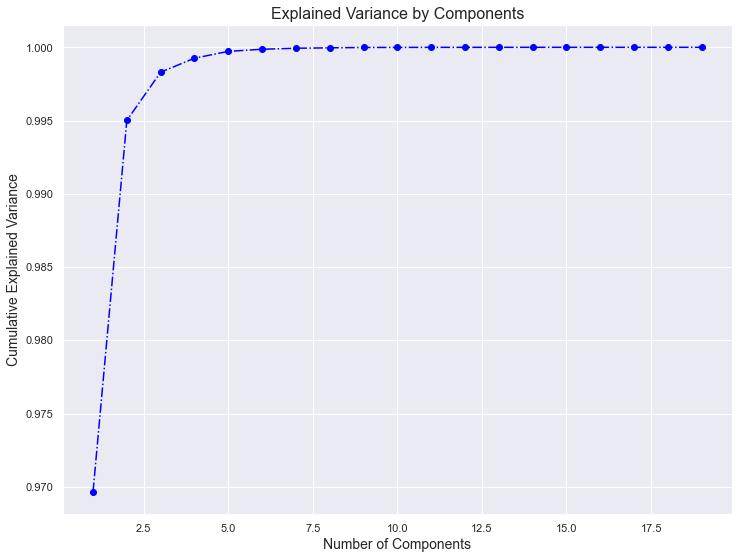

In [71]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,20), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '-.',color='blue')
plt.title('Explained Variance by Components',fontsize=16)
plt.xlabel('Number of Components',fontsize=14)
plt.ylabel('Cumulative Explained Variance',fontsize=14)

In [72]:
pca = PCA(n_components = 3)
pca.fit(train) #Fit the model the our data with the selected number of components

PCA(n_components=3)

In [73]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the 19 original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-4.37787966e-05,  5.76923531e-02,  9.64224061e-01,
         2.54063770e-02,  3.34401607e-04,  3.49794965e-03,
         2.56784065e-01,  1.79892133e-02,  4.69549763e-03,
        -1.11124087e-03, -5.31602110e-05, -7.01308318e-05,
         0.00000000e+00,  0.00000000e+00, -7.40756172e-04,
         0.00000000e+00,  4.22361818e-04,  1.73464959e-04,
        -5.45898249e-05],
       [ 3.32898091e-05, -1.13364758e-03, -2.57432373e-01,
        -8.26836932e-03, -3.92068875e-04, -2.13733110e-03,
         9.65871885e-01,  2.42669788e-02,  1.14241935e-02,
         5.08733013e-03,  3.41047093e-05,  4.75422518e-05,
         0.00000000e+00,  0.00000000e+00, -4.10176003e-04,
         0.00000000e+00,  4.36130923e-04,  2.33623942e-04,
        -7.40227614e-05],
       [ 2.89034710e-04,  9.42290233e-01, -6.15584504e-02,
         3.27873199e-01,  2.50184156e-03, -1.96459402e-02,
        -1.25316672e-02, -2.22267754e-04, -6.24598266e-03,
         1.43151779e-02,  1.65395880e-04,  9.27164212e-05,
    

In [75]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = train.columns,
                           index = ['Component_1', 'Component_2', 'Component_3'])
df_pca_comp

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
Component_1,-0.000044,0.057692,0.964224,0.025406,0.000334,0.003498,0.256784,0.017989,0.004695,-0.001111,-0.000053,-0.000070,0.0,0.0,-0.000741,0.0,0.000422,0.000173,-0.000055
Component_2,0.000033,-0.001134,-0.257432,-0.008268,-0.000392,-0.002137,0.965872,0.024267,0.011424,0.005087,0.000034,0.000048,0.0,0.0,-0.000410,0.0,0.000436,0.000234,-0.000074
Component_3,0.000289,0.942290,-0.061558,0.327873,0.002502,-0.019646,-0.012532,-0.000222,-0.006246,0.014315,0.000165,0.000093,0.0,0.0,0.002305,0.0,-0.000035,-0.000382,0.000090


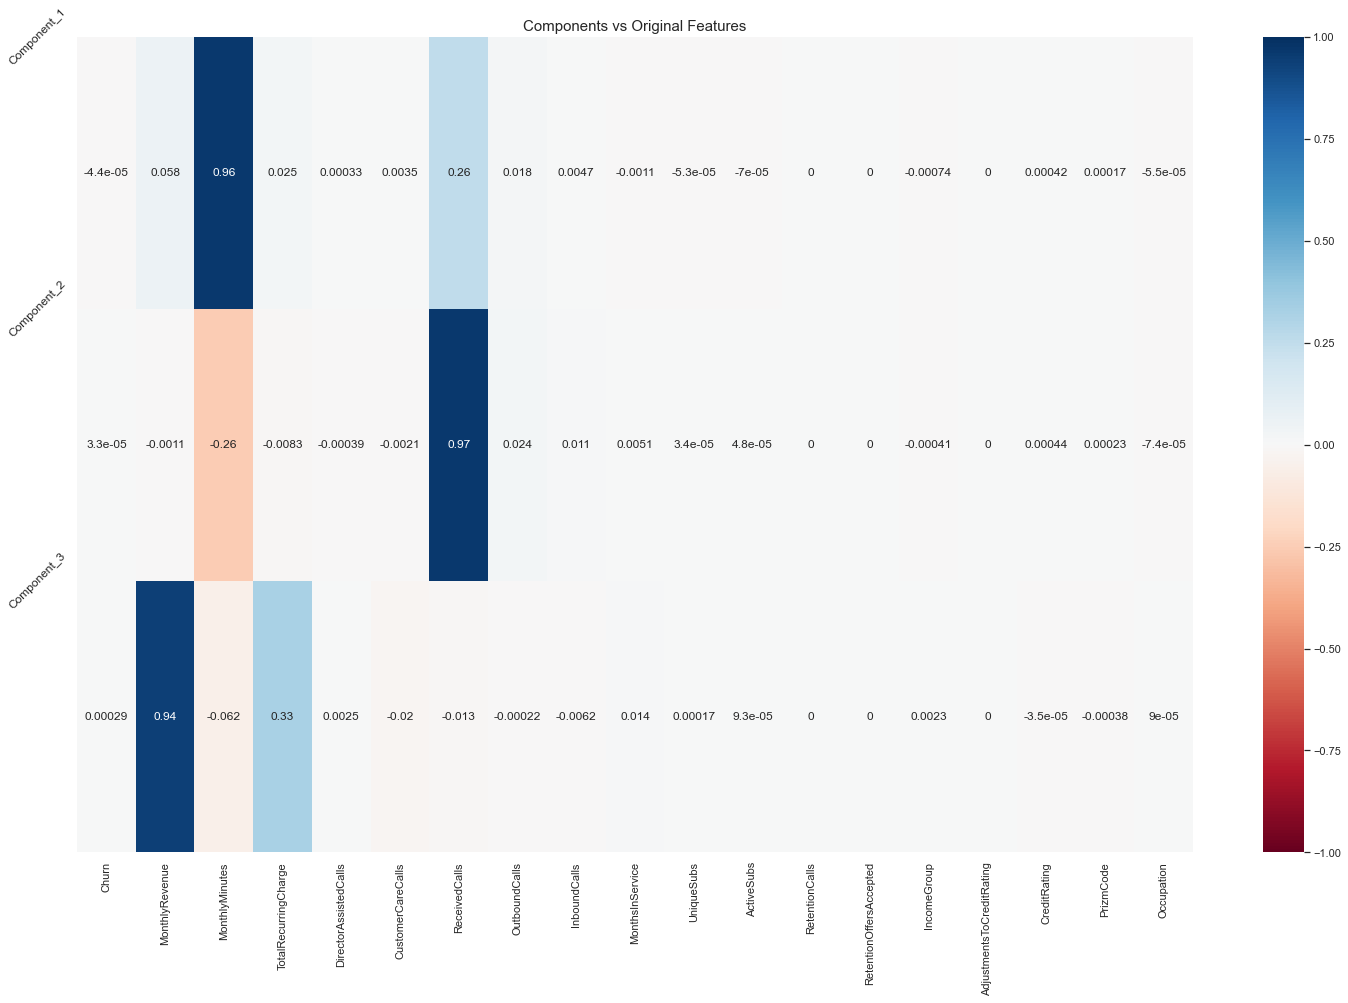

In [77]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
plt.figure(figsize=(25,15))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Component_1', 'Component_2', 'Component_3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 15)
plt.show()

In [78]:
pca.transform(train)

array([[-302.25160565,   61.80815601,  -21.61030277],
       [-529.26480501,   21.77902564,  -15.76992047],
       [-529.34062152,   22.48917439,   11.03313704],
       ...,
       [ 182.19840716,  -94.09866284,    8.59694076],
       [-156.91847227,  -53.72943755,   59.88983296],
       [1325.69307995,  233.85556983,  -35.2286215 ]])

In [79]:
scores_pca = pca.transform(train)

In [80]:
wcss = [] #k-means clustering with PCA
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

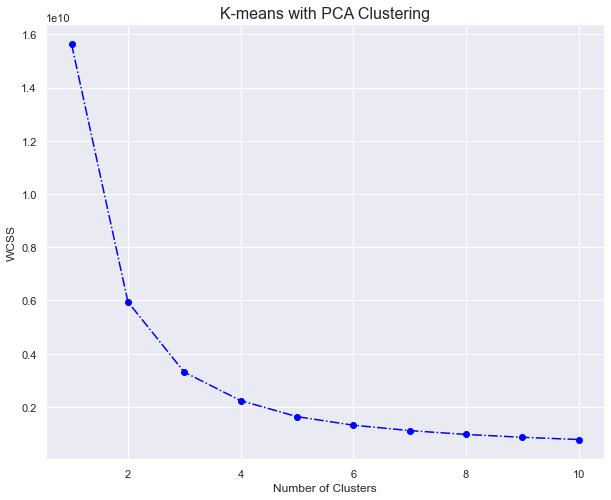

In [81]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

In [82]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

In [83]:
kmeans_pca.fit(scores_pca) # We fit our data with the k-means pca model

KMeans(n_clusters=3, random_state=42)

In [84]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([train.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component_1', 'Component_2', 'Component_3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment_Kmeans_PCA'] = kmeans_pca.labels_

In [89]:
#df_segm_pca_kmeans.head()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment_Kmeans_PCA']).mean()
df_segm_pca_kmeans_freq
df_segm_pca_kmeans_freq.reset_index()

,Segment_Kmeans_PCA,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,...,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,Component_1,Component_2,Component_3,N_Obs
0,0,0.234676,142.517455,1948.859019,81.580560,0.796757,7.169673,513.602744,37.134764,9.721716,...,0.0,3.262405,0.0,3.087566,3.057210,4.032983,1481.748621,18.998890,-2.456205,NaN
1,1,0.299901,41.851255,232.076969,38.852744,0.298677,0.768559,38.748204,10.962232,2.614124,...,0.0,4.339996,0.0,2.432467,2.799554,4.111255,-302.971708,2.076872,0.508447,16956.666667
2,2,0.270899,77.928649,865.336568,56.980243,0.597345,3.160325,195.317176,29.180876,7.130015,...,0.0,3.581101,0.0,2.837517,2.967166,4.054419,350.738406,-9.427402,-0.595948,NaN


In [ ]:
#df_segm_pca_kmeans

In [90]:
df_segm_pca_kmeans['N_Obs'] = df_segm_pca_kmeans.groupby(['Segment_Kmeans_PCA'])['Segment_Kmeans_PCA'].count()
df_segm_pca_kmeans

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,...,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,Component_1,Component_2,Component_3,Segment_Kmeans_PCA,N_Obs
0,1,24.00,219,22,0.25,0.0,97.2,0.0,0.0,26,...,4,0,1,2,5,-302.251606,61.808156,-21.610303,1,3426.0
1,1,16.99,10,17,0.00,0.0,0.0,0.0,0.0,26,...,5,0,4,2,5,-529.264805,21.779026,-15.769920,1,33221.0
2,0,38.00,8,38,0.00,0.0,0.4,0.3,0.0,26,...,6,0,3,1,2,-529.340622,22.489174,11.033137,1,14223.0
3,0,82.28,1312,75,1.24,4.3,200.3,41.0,12.0,26,...,6,0,4,4,4,783.638016,-119.364828,-18.054361,2,NaN
4,1,17.14,0,17,0.00,0.0,0.0,0.0,0.0,26,...,7,0,1,4,5,-538.900917,24.351599,-15.008784,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50865,0,31.92,63,17,0.00,0.0,14.0,0.0,0.0,26,...,3,0,3,4,4,-473.703102,21.641283,-5.145287,1,NaN
50866,0,50.00,492,50,0.00,0.3,7.5,6.7,0.0,26,...,0,0,4,2,4,-59.714713,-95.205578,-3.629552,1,NaN
50867,0,71.99,724,70,0.00,0.0,70.2,25.7,0.3,26,...,7,0,1,4,5,182.198407,-94.098663,8.596941,2,NaN
50868,1,117.49,384,30,0.00,0.0,21.7,1.3,0.0,26,...,2,0,4,4,5,-156.918472,-53.729438,59.889833,1,NaN


In [91]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N_Obs'] = df_segm_pca_kmeans.groupby(['Segment_Kmeans_PCA'])['Segment_Kmeans_PCA'].count()
df_segm_pca_kmeans_freq['Prop_Obs'] = df_segm_pca_kmeans_freq['N_Obs'] / df_segm_pca_kmeans_freq['N_Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Hign_MonthlyRevenue_TotalRecurringCharge', 
                                                          1:'Low_MonthlyRevenue_TotalRecurringCharge',
                                                          2: 'Medium_MonthlyRevenue_TotalRecurringCharge'
                                                     })
df_segm_pca_kmeans_freq

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,...,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation,Component_1,Component_2,Component_3,N_Obs,Prop_Obs
Segment_Kmeans_PCA,,,,,,,,,,,,,,,,,,,,,
Hign_MonthlyRevenue_TotalRecurringCharge,0.234676,142.517455,1948.859019,81.580560,0.796757,7.169673,513.602744,37.134764,9.721716,16.086982,...,3.262405,0.0,3.087566,3.057210,4.032983,1481.748621,18.998890,-2.456205,3426,0.067348
Low_MonthlyRevenue_TotalRecurringCharge,0.299901,41.851255,232.076969,38.852744,0.298677,0.768559,38.748204,10.962232,2.614124,17.497878,...,4.339996,0.0,2.432467,2.799554,4.111255,-302.971708,2.076872,0.508447,33221,0.653057
Medium_MonthlyRevenue_TotalRecurringCharge,0.270899,77.928649,865.336568,56.980243,0.597345,3.160325,195.317176,29.180876,7.130015,16.213387,...,3.581101,0.0,2.837517,2.967166,4.054419,350.738406,-9.427402,-0.595948,14223,0.279595


In [92]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment_Kmeans_PCA'].map({0:'Hign_MonthlyRevenue_TotalRecurringCharge', 
                                                          1: 'Low_MonthlyRevenue_TotalRecurringCharge',
                                                          2: 'Medium_MonthlyRevenue_TotalRecurringCharge'                            
                                                })

C:\Users\john.tan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


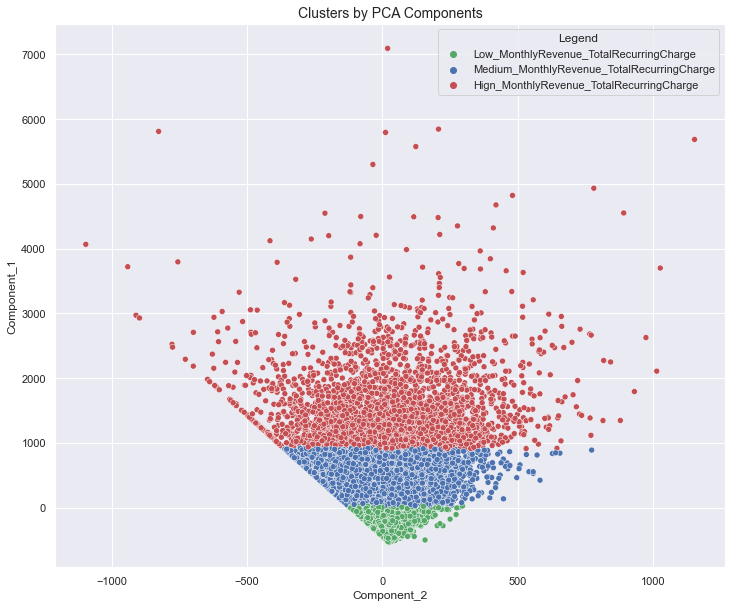

In [96]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component_2']
y_axis = df_segm_pca_kmeans['Component_1']
plt.figure(figsize = (12, 10))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'b', 'r'])
plt.title('Clusters by PCA Components',fontsize=15)
plt.show()

Text(0.5, 0, 'MonthlyRevenue')

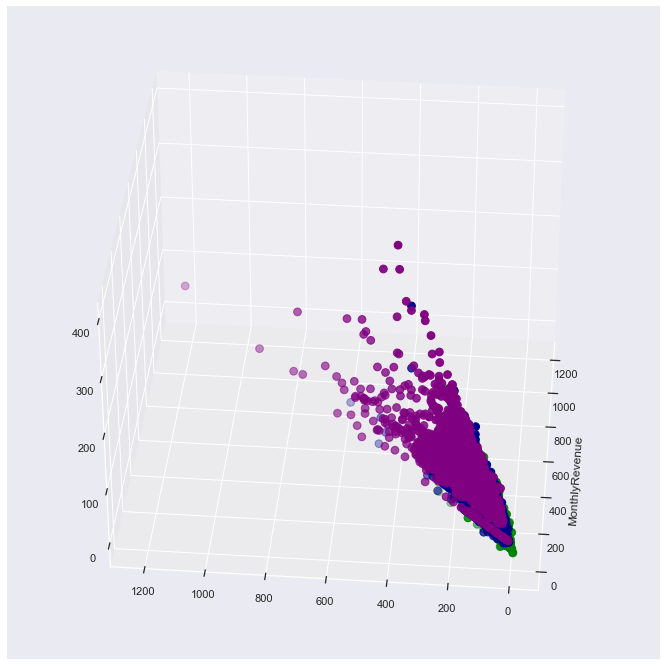

In [97]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_segm_pca_kmeans.MonthlyRevenue[df_segm_pca_kmeans.Segment_Kmeans_PCA == 0], df_segm_pca_kmeans["MonthlyRevenue"][df_segm_pca_kmeans.Segment_Kmeans_PCA == 0], df_segm_pca_kmeans["TotalRecurringCharge"][df_segm_pca_kmeans.Segment_Kmeans_PCA == 0], c='purple', s=60)
ax.scatter(df_segm_pca_kmeans.MonthlyRevenue[df_segm_pca_kmeans.Segment_Kmeans_PCA == 1], df_segm_pca_kmeans["MonthlyRevenue"][df_segm_pca_kmeans.Segment_Kmeans_PCA == 1], df_segm_pca_kmeans["TotalRecurringCharge"][df_segm_pca_kmeans.Segment_Kmeans_PCA == 1], c='green', s=60)
ax.scatter(df_segm_pca_kmeans.MonthlyRevenue[df_segm_pca_kmeans.Segment_Kmeans_PCA == 2], df_segm_pca_kmeans["MonthlyRevenue"][df_segm_pca_kmeans.Segment_Kmeans_PCA == 2], df_segm_pca_kmeans["TotalRecurringCharge"][df_segm_pca_kmeans.Segment_Kmeans_PCA == 2], c='darkblue', s=60)
ax.view_init(35, 185)
plt.xlabel("MonthlyRevenue")

In [115]:
leagues_short = ['premier_league'] #spanish_league, bundesliga, premier_league, 
dict_historical_data = {}

for league in leagues_short:
    frames = []
    for i in range(15, 21):
        df = pd.read_csv(r"https://raw.githubusercontent.com/JohnTan38/Python-Data-Analysis-/main/soccer/E0.csv")
        #df = pd.read_csv(r"https://raw.githubusercontent.com/JohnTan38/Python-Data-Analysis-/main/soccer/SP1.csv")
        df = df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
        df = df.rename(columns={'FTHG': 'HomeGoals', 'FTAG': 'AwayGoals'})
        df = df.assign(Season=i)
        frames.append(df)
    df_historical_data = pd.concat(frames)
    df_historical_data['Date'] = pd.to_datetime(df_historical_data['Date'])
    dict_historical_data[league] = df_historical_data

C:\Users\john.tan\AppData\Local\Temp\ipykernel_156\295863464.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_historical_data['Date'] = pd.to_datetime(df_historical_data['Date'])


In [ ]:
di_spain = {'Barcelona': 'FC Barcelona', 'Ath Madrid': 'AtlÃ©tico de Madrid', 'Ath Bilbao': 'Athletic Club', 'Almeria': 'UD AlmerÃ­a',
      'Osasuna': 'CA Osasuna', 'Getafe': 'Getafe CF', 'Girona': 'Girona FC', 'Sevilla': 'Sevilla FC', 'Celta': 'RC Celta',
     'Mallorca': 'RCD Mallorca', 'Espanol': 'RCD Espanyol de Barcelona', 'Vallecano': 'Rayo Vallecano', 'Cadiz': 'CÃ¡diz CF',
     'Elche': 'Elche CF', 'Villarreal': 'Villarreal CF', 'Valladolid': 'Real Valladolid CF', 'Sociedad': 'Real Sociedad',
     'Betis': 'Real Betis', 'Valencia': 'Valencia CF'}

dict_historical_data[league]['HomeTeam'] = dict_historical_data[league]['HomeTeam'].map(di_spain)
dict_historical_data[league]['AwayTeam'] = dict_historical_data[league]['AwayTeam'].map(di_spain)

In [116]:
for i in dict_historical_data:
    dict_historical_data[i]['TotalGoals'] = dict_historical_data[i]['HomeGoals'] + dict_historical_data[i]['AwayGoals']

In [117]:
for i in dict_historical_data:
    print(i)
    print(dict_historical_data[i]['TotalGoals'].mean())

premier_league
2.8698630136986303


In [118]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import poisson

C:\Users\john.tan\AppData\Local\Temp\ipykernel_156\1069369255.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


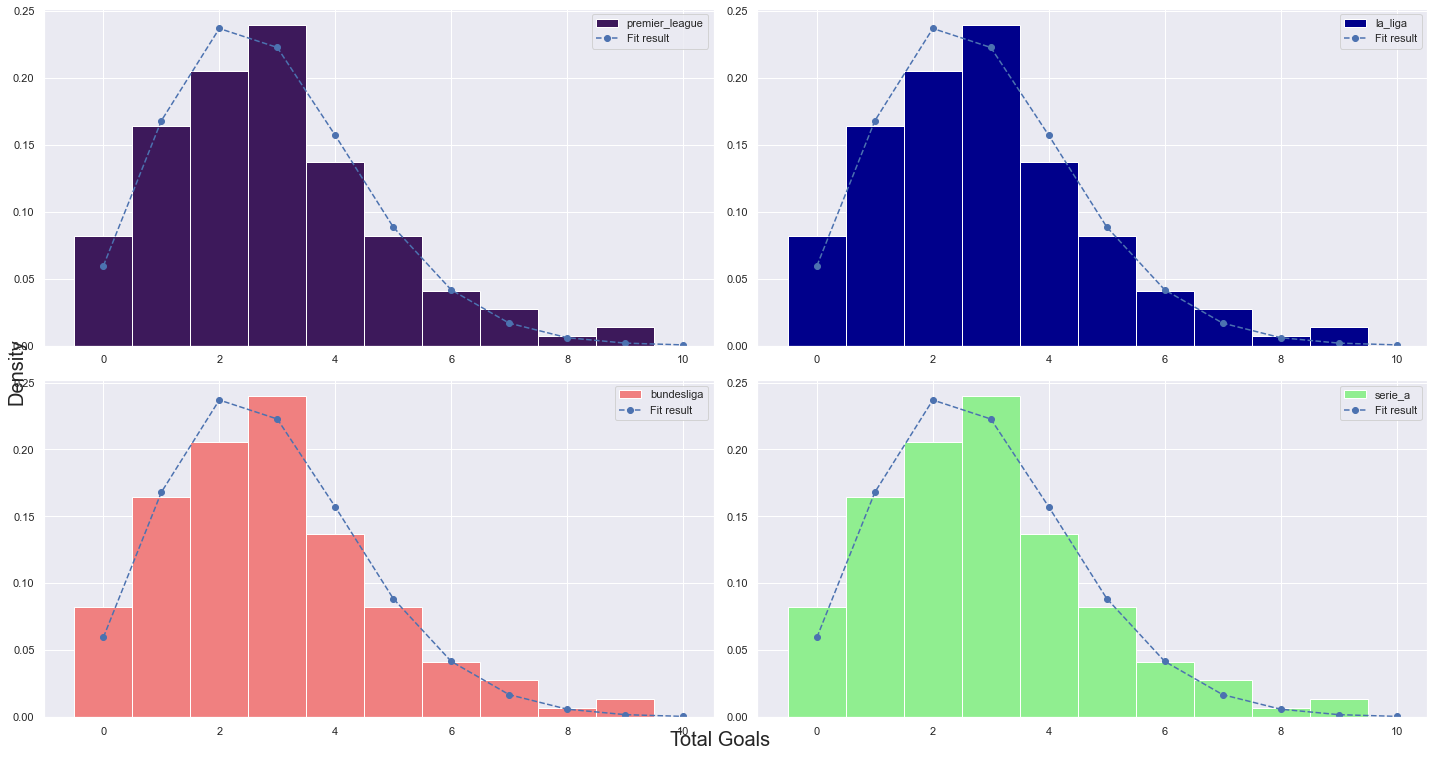

In [119]:
fig, ax = plt.subplots(nrows=2, ncols=2)
i=0
for row in ax:
    for col in row:
        dict_plot = {0:'premier_league', 1:'la_liga', 2:'bundesliga', 3:'serie_a'}
        dict_colors = {0:'#3D195B', 1:'darkblue', 2:'lightcoral', 3:'lightgreen'}
        try:
            data = dict_historical_data[dict_plot[i]]['TotalGoals']
        except:
            pass
        # the bins should be of integer width (poisson is an integer distribution)
        bins = np.arange(11) - 0.5
        try:
            entries, bin_edges, patches = col.hist(data, bins=bins, density=True, label=dict_plot[i], color=dict_colors[i])
        except:
            pass
        bin_middles = 0.5 * (bin_edges[1:] + bin_edges[:-1])

        #curve
        def fit_function(x, lamb):
            """Poisson function.Lamb is the fit parameter"""
            return poisson.pmf(x, lamb)
        parameters, cov_matrix = curve_fit(fit_function, bin_middles, entries) #optimal parameters
        x_plot = np.arange(0, 11)
        col.plot(x_plot, fit_function(x_plot, *parameters),marker='o', linestyle='--',
                 label='Fit result',)
        col.legend()
        i+=1

fig.set_size_inches(20, 10.5)
fig.text(0.5, 0.005, 'Total Goals', ha='center', size=20)
fig.text(0.005, 0.5, 'Density', va='center', rotation='vertical', size=20)
fig.tight_layout()
fig.show()

In [120]:
def calculate_strength(league):
    home = dict_historical_data[league][['HomeTeam', 'HomeGoals', 'AwayGoals']].rename(
        columns={'HomeTeam':'Team', 'HomeGoals':'HomeScored', 'AwayGoals':'HomeConceded'}).groupby(
        ['Team'], as_index=False)[['HomeScored', 'HomeConceded']].mean()
    away = dict_historical_data[league][['AwayTeam', 'HomeGoals', 'AwayGoals']].rename(
        columns={'AwayTeam':'Team', 'HomeGoals':'AwayConceded', 'AwayGoals':'AwayScored'}).groupby(
        ['Team'], as_index=False)[['AwayScored', 'AwayConceded']].mean()

    df_league_strength = pd.merge(home, away, on='Team')
    average_home_scored, average_home_conceded = home['HomeScored'].mean(), home['HomeConceded'].mean()
    average_away_scored, average_away_conceded = away['AwayScored'].mean(), away['AwayConceded'].mean()

    df_league_strength['HomeScored'] /= average_home_scored
    df_league_strength['HomeConceded'] /= average_home_conceded
    df_league_strength['AwayScored'] /= average_away_scored
    df_league_strength['AwayConceded'] /= average_away_conceded

    df_league_strength.set_index('Team', inplace=True)
    return df_league_strength

In [121]:
def predict_points(home, away):
    if home in df_league_strength.index and away in df_league_strength.index:
        #home_scored * away_conceded
        lamb_home = df_league_strength.at[home,'HomeScored'] * df_league_strength.at[away,'AwayConceded']
        lamb_away = df_league_strength.at[away,'AwayScored'] * df_league_strength.at[home,'HomeConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11): #number of goals home team
            for y in range(0, 11): #number of goals away team
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)

In [122]:
df_matches_left = pd.read_csv(r'https://raw.githubusercontent.com/JohnTan38/Python-Data-Analysis-/main/soccer/epl2022.csv')
#df_matches_left = pd.read_csv(r'https://raw.githubusercontent.com/JohnTan38/Python-Data-Analysis-/main/soccer/laliga2022.csv')
dict_matches_left = {}
dict_matches_left[league] = df_matches_left

In [126]:
table = pd.read_csv(r'https://raw.githubusercontent.com/JohnTan38/Python-Data-Analysis-/main/soccer/epltable2022.csv')
#table = pd.read_csv(r'https://raw.githubusercontent.com/JohnTan38/Python-Data-Analysis-/main/soccer/laligatable2022.csv')

In [127]:
#  Simulate the matches to predict final standings
league = 'premier_league' #'la_liga', 'premier_league', 'bundesliga', 'serie_a'
df_league_strength = calculate_strength(league)
dict_table = {}

dict_table[league] = table
list_points_home = []
list_points_away = []
for index, row in dict_matches_left[league].iterrows():
    home, away = row['HomeTeam'], row['AwayTeam']
    points_home, points_away = predict_points(home, away)
    dict_table[league].loc[dict_table[league]['Team'] == home, 'Points'] += points_home
    dict_table[league].loc[dict_table[league]['Team'] == away, 'Points'] += points_away
    #storing every match result
    list_points_home.append(round(points_home, 1))
    list_points_away.append(round(points_away, 1))

dict_table[league] = dict_table[league].sort_values('Points', ascending=False).reset_index()
dict_table[league] = dict_table[league][['Team', 'Points']]
dict_table[league].round(0)

,Team,Points
0,Arsenal,88.0
1,Man City,85.0
2,Newcastle,82.0
3,Liverpool,64.0
4,Brighton,61.0
5,Brentford,55.0
6,Fulham,54.0
7,Chelsea,53.0
8,Leicester,52.0
9,Crystal Palace,50.0
